In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score


In [2]:
# Cargar los datasets (ajusta las rutas a tus archivos)
job_postings = pd.read_csv(r"job_postings.csv")

In [3]:
job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3302 non-null   int64  
 1   job_title           3302 non-null   object 
 2   job_info            3302 non-null   object 
 3   position_type_id    3302 non-null   int64  
 4   company             3302 non-null   object 
 5   city                3302 non-null   object 
 6   location_id         3302 non-null   int64  
 7   skills              802 non-null    object 
 8   seniority_level_id  3302 non-null   int64  
 9   work_type           3302 non-null   object 
 10  industry_type_id    3302 non-null   int64  
 11  min_salary          3302 non-null   float64
 12  max_salary          3302 non-null   float64
 13  avg_salary          3302 non-null   float64
 14  company_score       3302 non-null   float64
 15  sector              3302 non-null   object 
 16  respon

In [4]:
job_postings.work_type.value_counts()

work_type
Unspecified    1649
In-Person      1514
Remote          119
Hybrid           20
Name: count, dtype: int64

In [5]:
job_postings.seniority_level_id.value_counts()

seniority_level_id
2    1341
1    1204
3     722
4      35
Name: count, dtype: int64

In [6]:
job_postings.industry_type_id.value_counts().sort_values(ascending=True)

industry_type_id
40      1
69      1
9       1
36      1
39      1
     ... 
55    103
26    140
72    322
71    859
1     923
Name: count, Length: 79, dtype: int64

In [7]:
job_postings.sector.value_counts().sort_values(ascending=True)

sector
Accounting & Legal                           1
Arts, Entertainment & Recreation             1
Hotels & Resorts                             1
Non-Profit Organizations                     1
Restaurants & Food Services                  1
Agriculture & Forestry                       1
Energy, Mining & Public Infrastructure       2
Mining & Metals                              2
Construction, Repair & Maintenance           4
Media & Entertainment                        4
Arts & Entertainment                         4
Media                                        5
Educación                                    5
Travel & Tourism                             5
Real Estate                                  5
Transportation & Logistics                   6
Telecommunications                           6
Consumer Services                            6
Non-Profit                                   7
Government                                   7
Legal                                        7
Oil, G

In [8]:
job_postings.position_type_id.value_counts()

position_type_id
7     1348
1      729
11     352
15     298
3      241
10     142
14      76
9       29
5       21
13      19
8       15
4       12
6        9
12       6
2        5
Name: count, dtype: int64

<Axes: xlabel='avg_salary', ylabel='Count'>

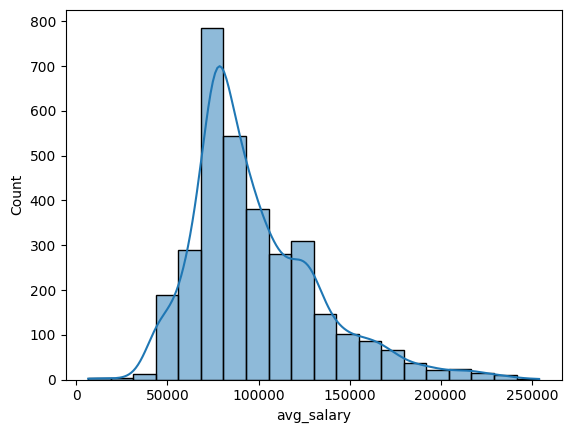

In [9]:
# Crear el histograma
sns.histplot(data=job_postings, x='avg_salary', bins=20, kde=True)

In [10]:
df=job_postings[['seniority_level_id','industry_type_id','position_type_id','location_id','avg_salary']].copy()

In [11]:
# Definición de los rangos (ejemplo personalizado)
rangos = [0, 75000, 100000, 150000, np.inf]  # Ajusta los rangos según tu análisis
labels = ['Menor a 75000$', 'Entre 75000$ y 100000$', 'Entre 100000$ y 150000$', 'Mayor a 150000$']

# Creación de la nueva columna
df['rango_salarial'] = pd.cut(df['avg_salary'], bins=rangos, labels=labels)
# Convertir las categorías a números
df['rango_salarial_num'] = pd.factorize(df['rango_salarial'])[0]

In [12]:
df.rango_salarial.value_counts()

rango_salarial
Entre 75000$ y 100000$     1360
Entre 100000$ y 150000$     929
Menor a 75000$              713
Mayor a 150000$             300
Name: count, dtype: int64

In [13]:
df.rango_salarial_num.value_counts()

rango_salarial_num
0    1360
1     929
3     713
2     300
Name: count, dtype: int64

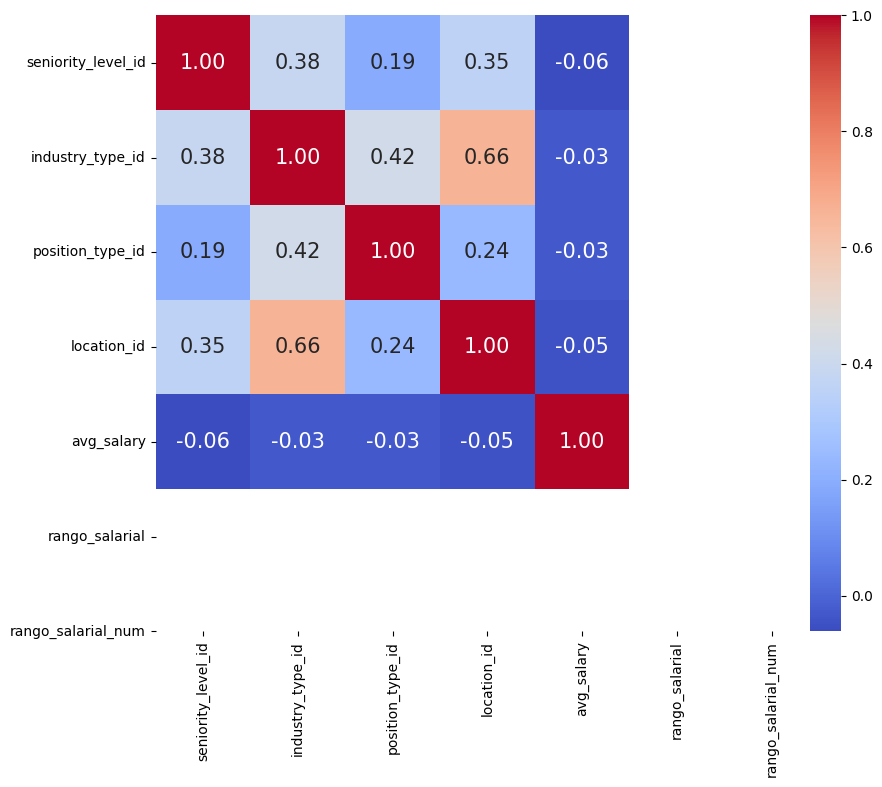

In [14]:
corr = df[['seniority_level_id','industry_type_id','position_type_id','location_id','rango_salarial_num']].corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.columns, 
           yticklabels= df.columns,
           cmap= 'coolwarm')
plt.show()

## Modelo arbol de decision

In [15]:
X = df[['seniority_level_id','industry_type_id','position_type_id','location_id']]  
y = df.rango_salarial_num # Etiqueta a predecir

In [18]:
# Importamos el modelo de arbol de decision 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Instanciamos un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 12, random_state = 42) 

# Entrenamos el modelo
clf.fit(X_Train, Y_Train)

# Exploramos algunas de las características del modelo entrenado. 
print(clf.classes_) #categorias de la variable a predecir 
print(clf.n_classes_) #numero de categorias de la variable a predecir
print(clf.max_features_) #max numero de atributos 
print(clf.feature_importances_) #nivel de relevancia de cada atributo en el mismo orden que fue asignado al instancia el modelo

# Predecimos
y_train_pred = clf.predict(X_Train)
y_test_pred = clf.predict(X_Test)

# Evaluamos
print('Accuracy en train:', accuracy_score(Y_Train, y_train_pred))
print('Accuracy en test:', accuracy_score(Y_Test, y_test_pred))

[0 1 2 3]
4
4
[0.06853737 0.22287398 0.16501405 0.54357461]
Accuracy en train: 0.6865912762520194
Accuracy en test: 0.5217917675544794


In [19]:
cm = confusion_matrix(Y_Test, y_test_pred)
print('Matriz de Confusión:\n', cm)

Matriz de Confusión:
 [[230  76   6  27]
 [ 59 155  17  14]
 [ 14  56   7   3]
 [101  18   4  39]]


## SVM

In [20]:
X = df[['seniority_level_id','industry_type_id','position_type_id','location_id']]  
y = df.rango_salarial_num # Etiqueta a predecir

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

classifier = SVC(kernel='poly', random_state=42) #trabajaremos con regresion polinomica, probar cambiando a linear
classifier.fit(X_Train, Y_Train)

# Predecimos
y_train_pred = classifier.predict(X_Train)
y_test_pred = classifier.predict(X_Test)

# Evaluamos
print('Accuracy en train:', accuracy_score(Y_Train, y_train_pred))
print('Accuracy en test:', accuracy_score(Y_Test, y_test_pred))

Accuracy en train: 0.5391605365642579
Accuracy en test: 0.5348133198789102


In [22]:
cm = confusion_matrix(Y_Test, y_test_pred)
print('Matriz de Confusión:\n', cm)

Matriz de Confusión:
 [[301 108   0   0]
 [ 62 229   0   1]
 [ 14  83   0   0]
 [163  30   0   0]]


## KGBoost

In [33]:
X = df[['seniority_level_id','industry_type_id','position_type_id','location_id']]  
y = df.rango_salarial_num # Etiqueta a predecir

In [34]:
# Importamos el modelo de arbol de decision 
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.3, random_state=42,stratify = y)

# Instanciamos un objeto de la clase DecisionTreeClassifier
clf_xgb = xgb.XGBClassifier(n_estimators=120, seed=42, use_label_encoder= False)
                            
# Entrenamos
clf_xgb.fit(X_Train, Y_Train)

# Predecimos
y_train_pred = clf_xgb.predict(X_Train)
y_test_pred = clf_xgb.predict(X_Test)

# Evaluamos
print('Accuracy en train:', accuracy_score(Y_Train, y_train_pred))
print('Accuracy en test:', accuracy_score(Y_Test, y_test_pred))

c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [09:37:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy en train: 0.7131112072695802
Accuracy en test: 0.5408678102926338


In [35]:
cm = confusion_matrix(Y_Test, y_test_pred)
print('Matriz de Confusión:\n', cm)

Matriz de Confusión:
 [[283  80   7  38]
 [ 64 180  23  12]
 [  8  66  13   3]
 [120  33   1  60]]


In [36]:
import scipy as sp
from scipy import stats

param_dist = {
    'n_estimators': sp.stats.randint(50, 300),  # Número de árboles en el modelo
    'max_depth': sp.stats.randint(3, 15),  # Profundidad máxima del árbol
    'learning_rate': sp.stats.uniform(0.01, 0.3),  # Tasa de aprendizaje
    'subsample': sp.stats.uniform(0.5, 0.5),  # Fracción de muestras usadas para entrenar cada árbol
    'colsample_bytree': sp.stats.uniform(0.5, 0.5),  # Fracción de características usadas para cada árbol
    'gamma': sp.stats.uniform(0, 10),  # Mínimo aumento en la pérdida necesaria para hacer una partición adicional en un nodo
    'reg_alpha': sp.stats.uniform(0, 1),  # Regularización L1
    'reg_lambda': sp.stats.uniform(0, 1)  # Regularización L2
}

In [37]:
from sklearn.model_selection import RandomizedSearchCV

classifier = xgb.XGBClassifier() #instanciamos el modelo 
model = RandomizedSearchCV(classifier, param_dist,n_iter=100, random_state=0, cv=3) #fijarse que se envia el numero de iteraciones maximo y una semilla por ser un proceso aleatorio

# Entrenamos el modelo con la grilla
model.fit(X_Train, Y_Train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026D36913AC0

In [38]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores hiperparámetros: {'colsample_bytree': 0.6625236145041762, 'gamma': 0.38425426472734725, 'learning_rate': 0.2002822173872005, 'max_depth': 9, 'n_estimators': 246, 'reg_alpha': 0.6527903170054908, 'reg_lambda': 0.6350588736035638, 'subsample': 0.9976497838389438}
Mejor Score: 0.5538722410317741



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.093564,0.011146,0.008602,0.007228,0.774407,7.151894,0.190829,6,153,0.423655,0.645894,0.718794,"{'colsample_bytree': 0.7744067519636624, 'gamm...",0.527886,0.555844,0.531169,0.538300,0.012478,49
1,0.067720,0.002535,0.000639,0.000904,0.945887,9.636628,0.125032,9,89,0.528895,0.568045,0.962798,"{'colsample_bytree': 0.9458865003910399, 'gamm...",0.526589,0.544156,0.529870,0.533538,0.007626,71
2,0.322703,0.015726,0.001649,0.002332,0.535518,0.871293,0.016066,6,247,0.778157,0.870012,0.989309,"{'colsample_bytree': 0.5355180290989434, 'gamm...",0.546044,0.557143,0.541558,0.548248,0.006550,15
3,0.064886,0.004602,0.000187,0.000264,0.899579,4.614794,0.244159,10,82,0.58202,0.537373,0.879308,"{'colsample_bytree': 0.8995792821083618, 'gamm...",0.535668,0.554545,0.535065,0.541759,0.009044,38
4,0.171373,0.008930,0.000813,0.001150,0.552954,4.736004,0.0659,5,233,0.21655,0.135218,0.662071,"{'colsample_bytree': 0.5529538035938961, 'gamm...",0.538262,0.553247,0.525974,0.539161,0.011152,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.170552,0.008224,0.001639,0.002317,0.76543,0.852331,0.209703,6,230,0.889287,0.682119,0.945657,"{'colsample_bytree': 0.7654300652679359, 'gamm...",0.551232,0.554545,0.542857,0.549545,0.004919,10
96,0.066054,0.001888,0.011538,0.008289,0.500604,9.372188,0.297492,13,105,0.190567,0.019123,0.759075,"{'colsample_bytree': 0.5006037858684244, 'gamm...",0.527886,0.548052,0.524675,0.533538,0.010346,74
97,0.200796,0.011544,0.000000,0.000000,0.921388,3.73216,0.076859,5,267,0.274575,0.00869,0.512472,"{'colsample_bytree': 0.9213884313424212, 'gamm...",0.540856,0.566234,0.536364,0.547818,0.013151,18
98,0.170791,0.007786,0.001079,0.001526,0.572143,5.137597,0.076797,10,241,0.055107,0.911197,0.942476,"{'colsample_bytree': 0.5721430482944454, 'gamm...",0.534371,0.553247,0.528571,0.538730,0.010535,48


## Random Forest

In [26]:
X = df[['seniority_level_id','industry_type_id','position_type_id','location_id']]  
y = df.rango_salarial_num # Etiqueta a predecir

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.35, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

classifier = RandomForestClassifier(random_state=42) #trabajaremos con regresion polinomica, probar cambiando a linear
classifier.fit(X_Train, Y_Train)

# Predecimos
y_train_pred = classifier.predict(X_Train)
y_test_pred = classifier.predict(X_Test)

# Evaluamos
print('Accuracy en train:', accuracy_score(Y_Train, y_train_pred))
print('Accuracy en test:', accuracy_score(Y_Test, y_test_pred))

Accuracy en train: 0.7264678471575023
Accuracy en test: 0.523356401384083


In [28]:
cm = confusion_matrix(Y_Test, y_test_pred)
print('Matriz de Confusión:\n', cm)

Matriz de Confusión:
 [[327  80  14  55]
 [ 82 190  38  15]
 [ 21  64  18   2]
 [141  37   2  70]]


In [29]:
import scipy as sp
from scipy import stats

# Grilla para Randomized Search
param_dist = {
    'n_estimators': sp.stats.randint(10, 200),  # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar en cada división
    'max_depth': sp.stats.randint(1, 50),  # Profundidad máxima del árbol
    'min_samples_split': sp.stats.randint(2, 20),  # Mínimo número de muestras necesarias para dividir un nodo
    'min_samples_leaf': sp.stats.randint(1, 20),  # Mínimo número de muestras necesarias para estar en un nodo hoja
    'bootstrap': [True, False]  # Si se deben usar muestras de bootstrap para construir árboles
}

In [31]:
from sklearn.model_selection import RandomizedSearchCV

classifier = RandomForestClassifier() #instanciamos el modelo 
model = RandomizedSearchCV(classifier, param_dist,n_iter=100, random_state=0, cv=3) #fijarse que se envia el numero de iteraciones maximo y una semilla por ser un proceso aleatorio

# Entrenamos el modelo con la grilla
model.fit(X_Train, Y_Train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026D2E8CFB20>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026D2E018FD0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026D2E8EE340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026D2EB8AA60>},
                   random_state=0)

In [32]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 46, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 59}
Mejor Score: 0.5503249078668073



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.124669,0.004348,0.014300,0.003515,True,48,sqrt,1,5,113,"{'bootstrap': True, 'max_depth': 48, 'max_feat...",0.505587,0.525874,0.528671,0.520044,0.010287,98
1,0.076461,0.007096,0.006389,0.009035,False,20,sqrt,19,6,97,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.536313,0.530070,0.555245,0.540543,0.010704,21
2,0.049598,0.001505,0.001908,0.002217,True,25,auto,13,3,49,"{'bootstrap': True, 'max_depth': 25, 'max_feat...",0.539106,0.528671,0.539860,0.535879,0.005106,67
3,0.030701,0.003570,0.001077,0.001524,False,47,auto,18,7,35,"{'bootstrap': False, 'max_depth': 47, 'max_fea...",0.537709,0.534266,0.544056,0.538677,0.004055,38
4,0.073216,0.007707,0.004865,0.006880,False,9,sqrt,17,7,89,"{'bootstrap': False, 'max_depth': 9, 'max_feat...",0.537709,0.530070,0.545455,0.537745,0.006281,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.081369,0.001225,0.018938,0.000752,True,34,auto,1,11,90,"{'bootstrap': True, 'max_depth': 34, 'max_feat...",0.519553,0.524476,0.534266,0.526098,0.006115,96
96,0.144174,0.006426,0.010908,0.007733,True,9,sqrt,11,18,165,"{'bootstrap': True, 'max_depth': 9, 'max_featu...",0.534916,0.532867,0.546853,0.538212,0.006167,41
97,0.011202,0.007922,0.000000,0.000000,True,2,auto,6,4,13,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.537709,0.541259,0.531469,0.536812,0.004047,60
98,0.139625,0.009011,0.010173,0.008244,True,47,sqrt,12,8,158,"{'bootstrap': True, 'max_depth': 47, 'max_feat...",0.532123,0.525874,0.552448,0.536815,0.011345,57
